# Import Libraries

In [101]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import json
from sqlalchemy import create_engine, MetaData, Table
from sqlalchemy.orm import sessionmaker

# Reading & Handling Data

__Read data from DB__

In [104]:
with open('../config/credentials.json', 'r') as json_file:
    data = json.load(json_file)
    host = data["host"]
    database = data["database"]
    user = data["user"]
    password = data["password"]

# Establecer Conexión
database_connection = f"postgresql://{user}:{password}@{host}/{database}"
engine = create_engine(database_connection)

# Inicializar la sesión
Session = sessionmaker(bind=engine)
session = Session()
metadata = MetaData(bind=engine)
metadata.reflect()

# Acceder a la tabla 'spotify_data'
spotify_table = metadata.tables['spotify_data']
spotify_records = session.query(spotify_table).all()
spotify_data = [record._asdict() for record in spotify_records]
df_spotify = pd.DataFrame(spotify_data)

# Cerrar la sesión
session.close()

In [95]:
df=df_spotify
df.head()

,unnamed_0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   unnamed_0         114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           114000 non-null  object 
 3   album_name        114000 non-null  object 
 4   track_name        114000 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

## EDA

In [96]:
# Calculate NAs Percent
total_entries = len(df)
missing_per_column = df.isnull().sum()
percentage_missing = (missing_per_column / total_entries) * 100
print(percentage_missing)

unnamed_0           0.0
track_id            0.0
artists             0.0
album_name          0.0
track_name          0.0
popularity          0.0
duration_ms         0.0
explicit            0.0
danceability        0.0
energy              0.0
key                 0.0
loudness            0.0
mode                0.0
speechiness         0.0
acousticness        0.0
instrumentalness    0.0
liveness            0.0
valence             0.0
tempo               0.0
time_signature      0.0
track_genre         0.0
dtype: float64


_As it is shown, there is a very low percentage of missing data, so there is no need to impute them._

In [97]:
df.describe()

,unnamed_0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


Popularity:

- Average: 33.24, indicating a generally moderately low popularity.
- Range: 0 to 100, with a distribution leaning towards lower values since 75% of the tracks have a popularity of 50 or less.

Duration:

- Average: 228,029 milliseconds (approximately 228 seconds or almost 4 minutes).
- Range: From zero to over 5,237,295 milliseconds, suggesting the presence of some tracks with extremely long durations that could be outliers or errors.

Energy:

- Average: 0.641, indicating a rather high energy level.
- Standard deviation: 0.251, reflecting moderate variability in energy among the tracks.

Danceability:

- Average: 0.567, suggesting that the tracks are moderately danceable.

Other musical features (such as acousticness, instrumentality, and valence) display a wide range of values, indicating significant diversity in the musical characteristics of the tracks in the dataset.

### Graphs

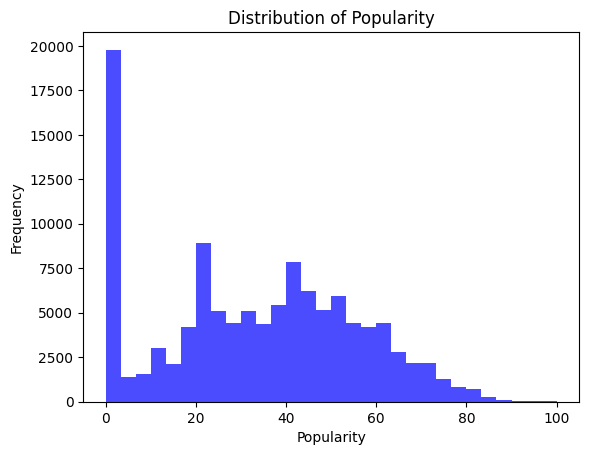

In [98]:
plt.hist(df['popularity'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

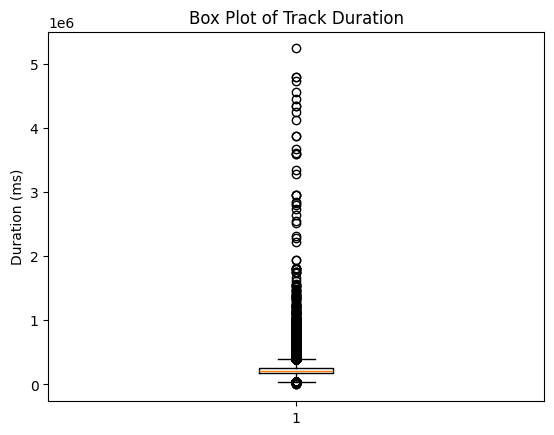

In [99]:
plt.boxplot(df['duration_ms'])
plt.title('Box Plot of Track Duration')
plt.ylabel('Duration (ms)')
plt.show()

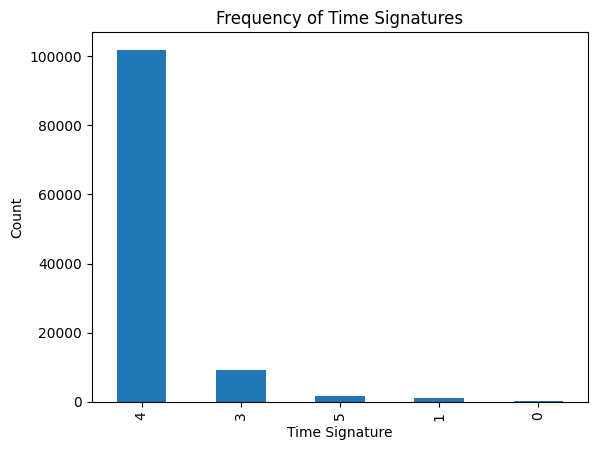

In [100]:
df['time_signature'].value_counts().plot(kind='bar')
plt.title('Frequency of Time Signatures')
plt.xlabel('Time Signature')
plt.ylabel('Count')
plt.show()